In this project, we will analyze Northwestern University COVID Cases from November 2020 to April 2021. Specifically, we will (1) create a line graph of positivity rate, faculty cases, and student cases, (2) analyze whether there is a strong correlation between these case breakdowns and the overall positivity rate, and (3) examine whether a predictive model can exist to inform future cases. 

                         Faculty Cases  Staff Cases  Student Cases  \
Faculty Cases                 1.000000     0.378512      -0.282928   
Staff Cases                   0.378512     1.000000      -0.019021   
Student Cases                -0.282928    -0.019021       1.000000   
Non-Undergraduate Cases       0.306715     0.348070       0.071890   
Undergraduate Cases          -0.391964    -0.160088       0.913267   
Total Tests                  -0.553305    -0.606493       0.510878   
Positivity Rate               0.459673     0.258910      -0.287113   

                         Non-Undergraduate Cases  Undergraduate Cases  \
Faculty Cases                           0.306715            -0.391964   
Staff Cases                             0.348070            -0.160088   
Student Cases                           0.071890             0.913267   
Non-Undergraduate Cases                 1.000000            -0.340652   
Undergraduate Cases                    -0.340652             1.000000   
T

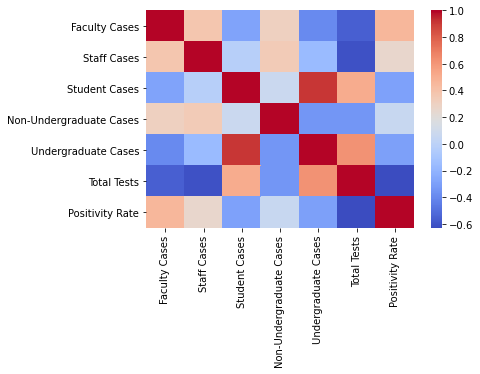

In [2]:
#Required Packages
import numpy as np #The Numpy numerical computing library
import pandas as pd #The Pandas data science library
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

#Read file 
data=pd.read_csv("NorthwesternCOVID.csv")

#Dropping NA rows 
data.dropna(subset = ['Total Tests'], inplace=True)

#Converting to date time form & renaming the column
data['Week Start']= pd.to_datetime(data['Week Start'], format='%Y-%m-%d')
data.rename(columns={'Week Start': 'Date'}, inplace=True)
data['Date'] = pd.to_datetime(data['Date']).dt.date

#Correlation Plotting
corr = data.corr()
print(corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap='coolwarm')
plt.show()



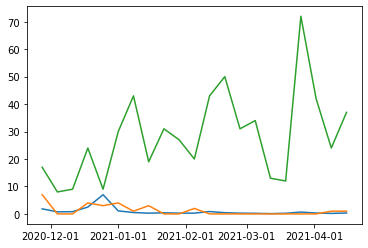

In [3]:
#Line plot for Positivity Rate, Faculty Cases, Student Cases
ax = plt.gca()
formatter = mdates.DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(formatter)

plt.plot(data["Date"], data["Positivity Rate"])
plt.plot(data["Date"], data["Faculty Cases"])
plt.plot(data["Date"], data["Student Cases"])

This shows the positivity rate is blue, faculty cases in orange, and student cases in green. This graph gives additional context to Northwestern University's existing Covid-19 Dashboard. 

In [5]:
#Preparing for Machine Learning
bins=[]
for i in range (0,6):
    bins.append((np.percentile(data["Positivity Rate"], i*20)))

group_names=[1.0, 2.0, 3.0,4.0,5.0]

data['Positivity Rate'] = pd.cut(data['Positivity Rate'], bins=bins, labels=group_names)

data.dropna(axis = 0, inplace=True)


#Random Forest Classifiers
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)


def random_forest(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                              random_state = 200)
    clf = RandomForestClassifier(n_estimators=200).fit(X_train, y_train)
    print('Accuracy of Random Forest classifier on training set: {:.2f}'
          .format(clf.score(X_train, y_train)))
    print('Accuracy of Random Forest classifier on test set: {:.2f}'
          .format(clf.score(X_test, y_test)))
    
target = data['Positivity Rate']
target = pd.get_dummies(target)
# Removing the columns Player Name, Wins, and Winner from the dataframe
ml_df = data.copy()
ml_df.drop(['Date'], axis=1, inplace=True)
random_forest(ml_df, target)

Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.75
